In [7]:
import numpy as np
import os
import tempfile
from pdf2image import convert_from_path
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import warnings
warnings.filterwarnings('ignore')

In [12]:
filename = '../Desktop/task3/6201 11-1/Well_logs/620111-1 composite logs.pdf'
dpi = 400
dpi_scale = int(dpi / 200)
 
with tempfile.TemporaryDirectory() as path:
     images_from_path = convert_from_path(filename, output_folder=path, last_page=0, first_page=0, dpi=400)

base_filename = os.path.splitext(os.path.basename(filename))[0] + '.jpg'     
 
save_dir = '../Desktop/task3/6201 11-1/Well_logs/'
 
for page in images_from_path:
    page.save(os.path.join(save_dir, base_filename), 'JPEG')

In [13]:
img = cv2.imread('../Desktop/task3/6201 11-1/Well_logs/620111-1 composite logs.jpg',1)
img1 = imutils.resize(img)

### Work with gamma ray

In [14]:
def crop_gr_head(img, scale):
    """
    Crop gamma-ray header
    """
    return img[361*scale:760*scale, 339*scale:736*scale]

###

In [64]:
def crop_gr_log(img, scale):
    """
    Crop gamma-ray well logs
    """
    return img[765*scale:-5, 342*scale:736*scale]

###

In [65]:
GR_header = crop_gr_head(img1, dpi_scale).astype('int64')
GR_graph = crop_gr_log(img1, dpi_scale).astype('int64')
gr_line = gr_line = GR_header[251*dpi_scale, 100*dpi_scale]

In [121]:
dist = np.sqrt(((GR_graph[..., None, :] - gr_line[None]) ** 2).sum(-1))

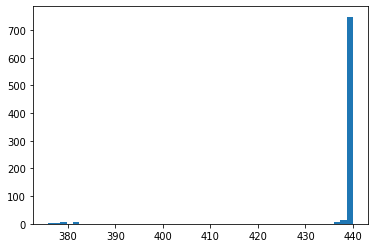

In [122]:
plt.hist(dist[90], density = False, bins = 50);

In [123]:
def get_log(thresh, dist):
    
    masks = dist < thresh
    raw = np.arange(masks.shape[1])[:, None]
    map_ = np.tile(raw, [len(masks), 1, 1])
    raw_mask = (map_ * masks)
    logs = []
    for i in raw_mask:
        logs.append(i[i != 0].mean())
        
    return logs

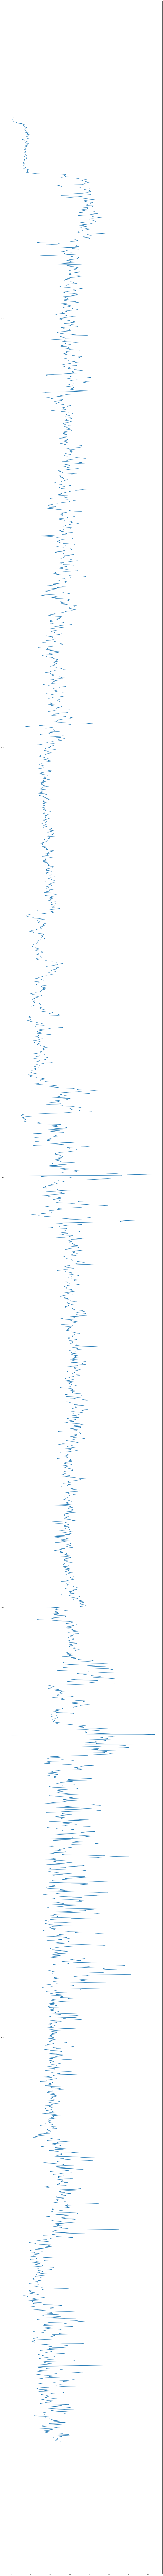

In [124]:
gr_logs = get_log(30, dist)
plt.figure(figsize = (30, 500))
plt.plot(gr_logs[::-1], range(len(gr_logs)));

In [125]:
cal_line = GR_header[dpi_scale*151, dpi_scale*100]astype('int64')
cal_line

array([  0, 148,   0])

In [126]:
cal_dist = np.sqrt(((GR_graph[..., None, :] - cal_line[None]) ** 2).sum(-1))

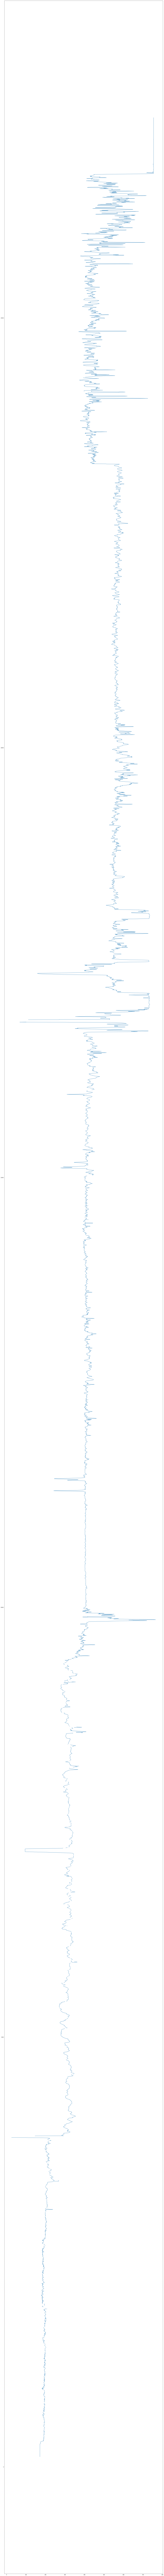

In [135]:
cal_logs = get_log(100, cal_dist)
plt.figure(figsize = (30, 500))
plt.plot(cal_logs[::-1], range(len(cal_logs)));

### Cross-over

In [169]:
def crop_co_head(img, scale):
    
    return img[250*scale:760*scale, 980*scale:1380*scale]

In [170]:
co_header = crop_co_head(img1, dpi_scale).astype('int64')

In [171]:
bulk_density_line = co_header[162*dpi_scale, 100*dpi_scale].astype('int64')
bulk_density_line

array([  0,   0, 211])

In [172]:
def crop_co_graph(img, scale):
    
    return img[760*scale:,980*scale:1380*scale]

In [173]:
co_graph = crop_co_graph(img1, dpi_scale).astype('int64')

In [174]:
bulk_density_dist = np.sqrt(((co_graph[..., None, :] - bulk_density_line[None]) ** 2).sum(-1))

In [ ]:
def dist_lines(l1, l2):
    for i in GR_graph
        

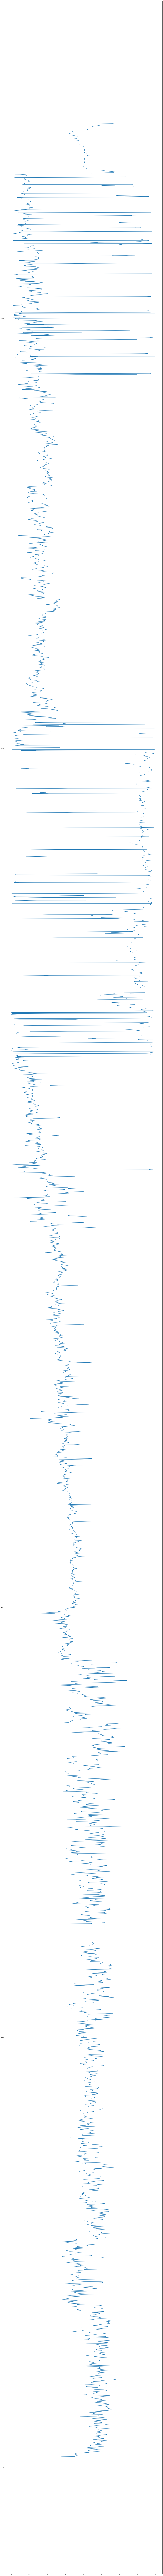

In [177]:
bulk_logs = get_log(100, bulk_density_dist)
plt.figure(figsize = (30, 500))
plt.plot(bulk_logs[::-1], range(len(bulk_logs)));